Занятие 6. Линейная регрессия
===========

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

### Предсказание цены домов в Альбукерке

In [2]:
df = pd.read_csv('Albuquerque Home Prices.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [3]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


In [4]:
df

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0
...,...,...,...,...,...,...,...,...
112,872,1229,6.0,3,0,0,0,721.0
113,870,1273,4.0,4,0,0,0,638.0
114,869,1165,7.0,4,0,0,0,694.0
115,766,1200,7.0,4,0,0,1,634.0


In [5]:
round(df['AGE'].mode())

0    4.0
dtype: float64

In [6]:
#df['AGE'].fillna(round(df['AGE'].mean()), inplace = True)

In [7]:
#df['AGE'].fillna(round(df['AGE'].mode().values[0]), inplace = True)

# Регрессия относительно AGE

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = df.dropna()[['AGE']]
y = df.dropna()['PRICE']

In [10]:
y

0      2050
2      2150
3      2150
4      1999
5      1900
       ... 
112     872
113     870
114     869
115     766
116     739
Name: PRICE, Length: 66, dtype: int64

In [11]:
X

,AGE
0,13.0
2,6.0
3,3.0
4,4.0
5,4.0
...,...
112,6.0
113,4.0
114,7.0
115,7.0


In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#model = LinearRegression(fit_intercept=0,normalize=True)
#model.fit(X, y)

In [14]:
#?LinearRegression

In [15]:
print ('R^2: {0}'.format(model.score(X, y)))

R^2: 0.02777622585530415


In [16]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,1248.208801
1,AGE,-5.264309


In [17]:
coef['coef']

0    1248.208801
1      -5.264309
Name: coef, dtype: float64

In [18]:
a,b=coef['coef']

In [19]:
a

1248.2088010240363

In [20]:
b

-5.2643094865595215

In [21]:
(2080-a)/b

-158.00575575954198

In [22]:
df['AGE'].fillna((df['PRICE']-a)/b, inplace = True)

In [23]:
df['AGE'][0:15]

0      13.000000
1    -158.005756
2       6.000000
3       3.000000
4       4.000000
5       4.000000
6       2.000000
7       1.000000
8     -38.331941
9       1.000000
10      4.000000
11      8.000000
12     15.000000
13     14.000000
14     18.000000
Name: AGE, dtype: float64

Прежде, чем строить модель, нужно решить вопрос с пропущенными значениями. Сначала посчитаем, сколько строчек их содержат.

In [24]:
print ('Rows in the data frame: {0}'.format(len(df)))
print ('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 117
Rows without NAN: 107


Таким образом, около половины наших данных содержат хотя бы одно пропущенное значение. Учитывая то, что данных относительно мало, выбрасывать все такие строчки, было бы слишком расточительно.

Попробуем копнуть глубже и посмотреть на распределение пропущенных значений по колонкам.

Функция ```DataFrame.apply``` применяет указанную функцию ко всей таблице. Первый аргумент -- применяемая функция, второй аргумент -- направление её применения (0 -- применить к колонкам, 1 -- ко строчкам).

In [25]:
df.apply(lambda x: sum(x.isnull()), axis=0)

PRICE     0
SQFT      0
AGE       0
FEATS     0
NE        0
CUST      0
COR       0
TAX      10
dtype: int64

Для определения функции здесь использовано так называемое лямбда-выражение (лямбда-функция). Это способ записать короткую функцию в одну строчку, не задавая её имени. В данном случае такое лямбда-выражение эквивалентно следующему определению функции:

`
def f(x):
    return sum(x.isnull())
`

Таким образом, видим, что источниками пропущенных значений являются колонки ```AGE``` и ```TAX```. Раз в колонке ```AGE``` так много пропусков, то проще её будет убрать из анализа, чем пытаться заделать эти дырки.

In [26]:
#del df['AGE']

А колонку ```TAX``` можно попробовать починить. Чтобы это сделать, сначала посмотрим, как выглядит распределение этой колонки.

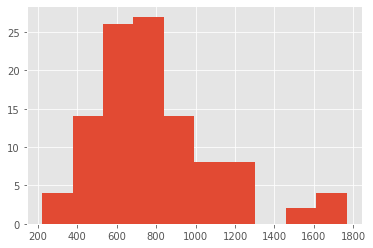

In [27]:
df['TAX'].hist()

Раз распределение похоже на нормальное, то можно заменить пропуски на среднее значение этой колонки. Для этого в pandas есть функция ```Series.fillna```, которая заменяет все пропущенные в колонке значения на заданное.

In [28]:
df['TAX'] = df['TAX'].fillna(df['TAX'].mean())

Убедимся, что все проблемы с пропусками устранены. Длина таблицы с пропусками равна длине исходного датасета.

In [29]:
len(df.dropna())

117

In [30]:
df=df.dropna()

#### Построение модели

Теперь можно переходить непосредственно к построению модели.

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [33]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Считаем качество модели (коэффициент $R^2$).

In [34]:
print ('R^2: {0}'.format(model.score(X, y)))

R^2: 0.8213645875050811


Выведем регрессионные коэффициенты от метода ```model.coef_``` и свободный член от метода ```model.intercept_```.

In [35]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,245.180290
1,SQFT,0.259366
2,AGE,-1.476649
3,FEATS,3.747059
4,NE,28.565313
5,CUST,119.868671
6,COR,-69.096122
7,TAX,0.495028


К сожалению, в ```sklearn``` не предусмотрена процедура определения статистической значимости регрессионных коэффициентов. Поэтому нужно это делать либо руками, вооружившись знанием о распределении коэффициентов, либо воспользовавшись моделью из пакета ```statsmodels```.

In [36]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,245.180290,0.001741
1,SQFT,0.259366,0.000014
2,AGE,-1.476649,0.000833
3,FEATS,3.747059,0.763564
4,NE,28.565313,0.401050
5,CUST,119.868671,0.005874
6,COR,-69.096122,0.085019
7,TAX,0.495028,0.000002


Как интерпретировать модель? У нас есть 3 значимых предиктора: ```SQFT```, ```CUST``` и ```TAX```.  Значение коэффициента говорит, на сколько вырастет значение сигнала при увеличении предиктора на одну единицу. Смысл первых двух коэффициентов понятен: площадь и специальный вид постройки ожидаемо влияют на цену. Но есть ли смысл включать в предсказание цены дома налог с этого же дома? Ведь налог, как и цена, также начисляется исходя из похожих предикторов. Они должны сильно коррелировать. И действительно. Построим таблицу парных корреляций предикторов.

Также мы получили, что AGE тоже является значимой переменной

In [37]:
df.corr()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
PRICE,1.000000,0.844795,-0.608447,0.420272,0.167840,0.555292,-0.079293,0.844889
SQFT,0.844795,1.000000,-0.533197,0.394925,0.145030,0.520102,0.040528,0.832674
AGE,-0.608447,-0.533197,1.000000,-0.365162,0.034439,-0.352962,-0.021714,-0.514342
FEATS,0.420272,0.394925,-0.365162,1.000000,0.190016,0.241964,-0.041547,0.419473
NE,0.167840,0.145030,0.034439,0.190016,1.000000,0.043033,-0.077336,0.189230
CUST,0.555292,0.520102,-0.352962,0.241964,0.043033,1.000000,-0.003994,0.444906
COR,-0.079293,0.040528,-0.021714,-0.041547,-0.077336,-0.003994,1.000000,-0.058329
TAX,0.844889,0.832674,-0.514342,0.419473,0.189230,0.444906,-0.058329,1.000000


Налоги сильно коррелируют с площадью. Предлагается откинуть налоги.

In [38]:
X = df[['SQFT', 'CUST','AGE']]
model.fit(X, y)
print (model.score(X, y))
regression_coef(model, X, y)

0.7622037924706166


,predictor,coef,pvalue
0,intercept,298.787642,0.000229
1,SQFT,0.481836,0.000000
2,CUST,123.632362,0.011836
3,AGE,-1.775075,0.000233


### Полиномиальная регрессия

In [39]:
df = pd.read_csv('diamond.dat', header=None, sep='\s+', names=['weight', 'price'])

In [40]:
df.head()

,weight,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [41]:
X = df.drop('price', axis=1)
y = df['price']

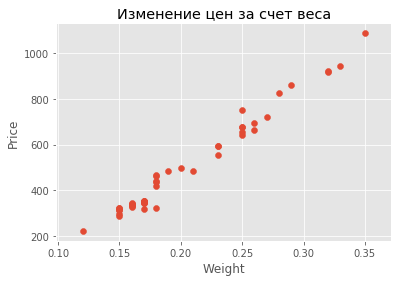

In [42]:
plt.scatter(X,y)

plt.title('Изменение цен за счет веса')

plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

Будем предсказывать цену кольца с бриллиантом от веса бриллианта. Попробуем предсказать результат не только с помощью самой переменной, но и с помощью её степеней. Первая модель будет зависеть только от самой переменной ```weight```, вторая -- от переменной ```weight^2```, а третья -- от двух этих переменных сразу.

В этих случаях, когда мы хотим попробовать в качестве фичей их степени и произведения фич, в ```sklearn.preprocessing``` есть класс ```PolynomialFeatures```. Метод ```fit_transform``` этого класса сгенерирует из данного множества фич множество одночленов заданной степени. Например, для степени 2 и фич ```a```, ```b``` будут сгенерированы фичи ```[a, b, a^2, b^2, ab]```, а при указанном параметре ```include_bias=True``` ещё и вектор-свободный член из единиц. Для данной задачи, конечно, проще было сгенерить один столбец из квадратов значений колонки ```weight```. Но нам важно ознакомиться с классом ```PolynomialFeatures``` для дальнейшего применения.

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(
                          # Максимальная степень
                          degree=2,
                          # Не генерировать свободный член
                          include_bias=False)
y = df['price']
X0 = poly.fit_transform(df[['weight']])
X0 = pd.DataFrame(X0, columns=['weight', 'weight^2'])
X0.head()

,weight,weight^2
0,0.17,0.0289
1,0.16,0.0256
2,0.17,0.0289
3,0.18,0.0324
4,0.25,0.0625


In [44]:
X0 = [
    # Одна оригинальная переменная weight
    X0[['weight']],
    # Одна переменная weight^2
    X0[['weight^2']],
    # Две переменных weight и weight^2
    X0.copy()]
models = [LinearRegression() for _ in X0]

In [45]:
X

,weight
0,0.17
1,0.16
2,0.17
3,0.18
4,0.25
5,0.16
6,0.15
7,0.19
8,0.21
9,0.15


In [46]:
y

0      355
1      328
2      350
3      325
4      642
5      342
6      322
7      485
8      483
9      323
10     462
11     823
12     336
13     498
14     595
15     860
16     223
17     663
18     750
19     720
20     468
21     345
22     352
23     332
24     353
25     438
26     318
27     419
28     346
29     315
30     350
31     918
32     919
33     298
34     339
35     338
36     595
37     553
38     345
39     945
40     655
41    1086
42     443
43     678
44     675
45     287
46     693
47     316
Name: price, dtype: int64

In [47]:
X0[0]

,weight
0,0.17
1,0.16
2,0.17
3,0.18
4,0.25
5,0.16
6,0.15
7,0.19
8,0.21
9,0.15


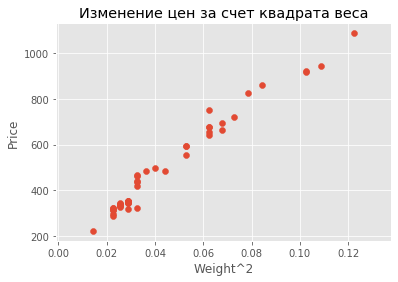

In [48]:
plt.scatter(X0[1],y)

plt.title('Изменение цен за счет квадрата веса')

plt.xlabel('Weight^2')
plt.ylabel('Price')
plt.show()

In [49]:
for X, model in zip(X0, models):
    model.fit(X, y)
    print (model.score(X, y))

0.978260777986033
0.9703108184171091
0.9789175801893899


Получилось, что $R^2$ во всех моделях примерно одинаков. Однако не все они одинаково полезны. 

In [50]:
regression_coef(models[0], X0[0], y)

,predictor,coef,pvalue
0,intercept,-259.625907,0.0
1,weight,3721.024852,0.0


Мы получили отрицательный свободный коэффицент. Это значит, что если бы мы продовали кольцо без бриллианта(его вес=0) то цена была бы отрицательна, что абсолютно не логично. Следовательно модель сомнительная

In [51]:
regression_coef(models[1], X0[1], y)

,predictor,coef,pvalue
0,intercept,141.659045,0.0
1,weight^2,7993.108083,0.0


In [52]:
regression_coef(models[2], X0[2], y)

,predictor,coef,pvalue
0,intercept,-174.130082,0.021866
1,weight,2920.130591,0.000077
2,weight^2,1739.901579,0.237265


Мы получили отрицательный свободный коэффицент. Это значит, что если бы мы продовали кольцо без бриллианта(его вес=0) то цена была бы отрицательна, что абсолютно не логично. Следовательно модель сомнительная

In [53]:
import statsmodels.api as sm
X2 = sm.add_constant(X0[2])
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1045.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.94e-38
Time:                        13:56:26   Log-Likelihood:                -232.47
No. Observations:                  48   AIC:                             470.9
Df Residuals:                      45   BIC:                             476.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.1301     74.238     -2.346      0.0

C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
y0=models[1].predict(X0[1])
y0

array([ 372.65986864,  346.28261196,  372.65986864,  400.63574693,
        641.22830024,  346.28261196,  321.5039769 ,  430.21024684,
        494.1551115 ,  321.5039769 ,  400.63574693,  768.31871876,
        346.28261196,  461.38336836,  564.49446264,  813.87943484,
        256.75980143,  681.99315146,  641.22830024,  724.35662431,
        400.63574693,  346.28261196,  372.65986864,  346.28261196,
        372.65986864,  400.63574693,  372.65986864,  400.63574693,
        372.65986864,  321.5039769 ,  372.65986864,  960.15331276,
        960.15331276,  321.5039769 ,  346.28261196,  346.28261196,
        564.49446264,  564.49446264,  372.65986864, 1012.10851531,
        641.22830024, 1120.81478524,  400.63574693,  641.22830024,
        641.22830024,  321.5039769 ,  681.99315146,  321.5039769 ])

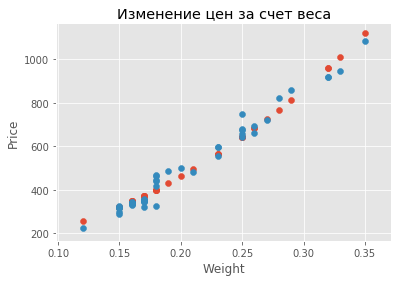

In [55]:
plt.scatter(X0[0],y0)
plt.scatter(X0[0],y)

plt.title('Изменение цен за счет веса')

plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

### Прогнозирование временных рядов.

In [56]:
df = pd.read_csv('series_g.csv', sep=';')
df.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [57]:
# Преобразуем строчки с датами в объект datetime
# format='%b %Y' означает, что в нашей строчке сначала идёт трёхбуквенное название месяца (%b), а затем год (%Y)
df['date'] = pd.to_datetime(df['date'], format='%b %Y')

Построим графики объёма пассажироперевозок и проверим, какой тип тренда (линейный или нет) и какой тип сезонности ( аддитивный или мультипликативный), наблюдается. По первому графику уже прослеживается линейный тренд и мультипликативная сезонность. Но чтобы окончательно убедиться в последнем, добавим график логарифма от этой же величины. После логирафмирования циклы стали одинаковой высоты, а это и говорит о мультипликативном харакрете сезонности.

Text(0, 0.5, 'log10 от тысяч человек')

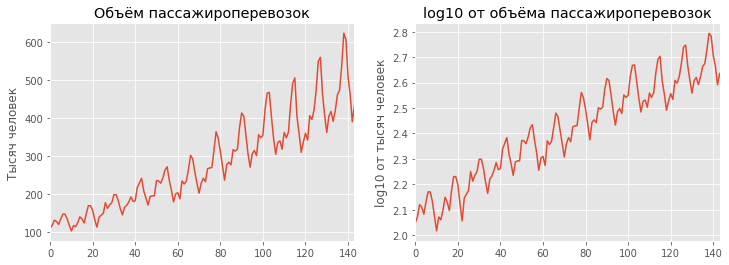

In [58]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['series_g'])).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


Вывод: будем строить модель линейной регрессии для приближения логарифма от объёма перевозок. То есть
$$\log y_i = \beta x_i + c(x_i) + \varepsilon_i,$$
где $y_i$ -- объём перевозок, $x_i$ -- порядковый номер месяца, $c(x_i)$ -- сезонная составляющая, $\varepsilon_i$ -- случайный шум.

Для удобства дальнейшего использования создадим дополнительно 12 новых месяцев для построения прогноза на них. Для этого создадим эти 12 новых дат с помощью функции ```pd.date_range```. Данный объект будет объектом класса ```DateTimeIndex``` (наследованный от класса ```Index```), и чтобы объединить их с колонкой ```df['date']```, принадлежащей классу ```datetime64```, придётся привести последнюю к классу ```Index```. Объединим два набора дат и сохраним их в объекте ```new_dates```.

Далее создадим фиктивный датафрейм ```df2```, состоящий из одной колонки с этими новыми датами, и приклеим его к исходному датафрейму ```df``` с помозью функции ```pd.merge```. Эта функция склеивает два датасета по указанному набору колонок (параметр ```on```) и по указанному правилу склейки (параметр ```how```). В ```on``` указываем одну общую колонку ```date```, по которой нужно произвести склейку. В ```how``` указываем ```right```, что означает следующее: 
возьми весь правый датасет и приклей к нему левый датасет по условию совпадения значений колонки ```on```, а в случае если для значений из правой колонки ```on``` не найдётся соотвествующих значений в левой колонке ```on```, то тогда приклей ```NaN``` значения. Вообще говоря, опция ```how``` соответствует опциям ```JOIN``` в языке SQL (```LEFT JOIN```, ```RIGHT_JOIN```, ```INNER JOIN```, ```OUTER_JOIN```).

In [59]:
# Создаём последовательсть месяцев. freq='MS' означает первое число каждого месяца из указанного диапазона дат
new_dates = pd.date_range('1961-01-01', '1961-12-01', freq='MS')
# Приводим df['date'] к типу Index, объединяем с 12 месяцами, полученными на предыдущем шаге
new_dates = pd.Index(df['date']) | new_dates
# Создаём датафрейм из одной колонки с расширенным набором дат
df2 = pd.DataFrame({'date': new_dates})
# Объединяем два датафрейма по колонке 'date'.
df = pd.merge(df, df2, on='date', how='right')

Создадим регрессионную переменную ```month_num``` -- порядковый номер пары (месяц, год). И прологарифмируем таргет.

In [60]:
df['month_num'] = range(1, len(df) + 1)
df['log_y'] = np.log10(df['series_g'])

Создадим 12 колонок ```season_1```, ```season_2```, ..., ```season_12```, в которые поместим индикаторы соответствующего месяца. Чтобы достать порядковый номер месяца в каждой строчке, применим последовательно пару методов ```dt``` и ```month``` к колонке ```df['date']```. Внутри цикла будем проверять, равен ли очередной месяц текущему значению из цикла.

In [61]:
for x in range(1, 13):
    df['season_' + str(x)] = df['date'].dt.month == x

Правда, для устранения линейной зависимости между колонками, один из сезонных индикаторов придётся исключить. Пусть базовым месяцем будет январь.

In [62]:
# xrange(2, 13) соответствует всем месяцам с февраля по декабрь
season_columns = ['season_' + str(x) for x in range(2, 13)]

# Создадим объекты матрицу X и вектор y для обучения модели
X = df[['month_num'] + season_columns]
y = df['log_y']

# Оставим только те строчки, у которых известны значения y (с номером < 144)
X1 = X[X.index < 144]
y1 = y[y.index < 144]

Настраиваем линейную регрессионную модель.

In [63]:
model = LinearRegression()
model.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

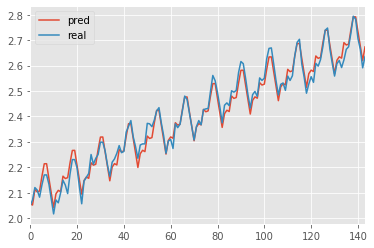

In [64]:
pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': y1})
pred.plot()

Теперь построим предсказание для всей матрицы ```X```, включая неизвестные 12 месяцев.

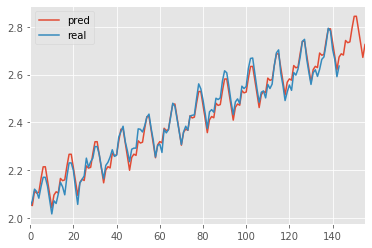

In [65]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [66]:
pred

,pred,real
0,2.057187,2.049218
1,2.051982,2.071882
2,2.112912,2.120574
3,2.103705,2.110590
4,2.107047,2.082785
...,...,...
151,2.844005,NaN
152,2.785564,NaN
153,2.729935,NaN
154,2.671892,NaN


In [67]:
res=pd.DataFrame({
    'pred': 10**pred['pred'],
    'real': 10**pred['real']})

In [68]:
res

,pred,real
0,114.074207,112.0
1,112.715073,118.0
2,129.691568,132.0
3,126.971040,129.0
4,127.952000,121.0
...,...,...
151,698.240208,NaN
152,610.328529,NaN
153,536.951593,NaN
154,469.777436,NaN


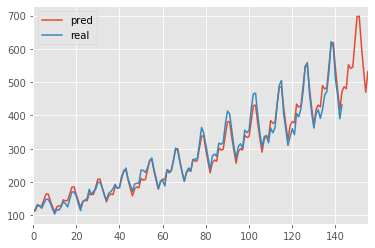

In [69]:
res.plot()